<a href="https://colab.research.google.com/github/yns030506/Colab_nlp-study/blob/main/LSA_nlp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
s = "No pain no gain"

In [ ]:
"No" in s

True

In [ ]:
s.split()

['No', 'pain', 'no', 'gain']

In [ ]:
s.split().index("gain")

3

In [ ]:
s[-4:]

'gain'

In [ ]:
s.split()[1][::-1]

'niap'

In [ ]:
s = "한글도 처리 가능"

In [ ]:
"처리" in s

True

In [ ]:
s.split()

['한글도', '처리', '가능']

In [ ]:
s.split()[0]

'한글도'

영어 처리

1. 대소문자 통합
- 대소문자 통합하지 않으면 컴퓨터는 다른 단어로 인식
-upper(), lower()로 처리 가능

In [ ]:
s = 'AbcDeFG'
str_upper = s.upper()
str_lower = s.lower()
print(str_lower, str_upper)

abcdefg ABCDEFG


2. 정규화

In [ ]:
s = "I visited UK from US on 22-09-20"
print(s)

I visited UK from US on 22-09-20


In [ ]:
new_s = s.replace("UK", "United Kingdom").replace("US", "United States").replace("-20", "-2020")
print(new_s)

I visited United Kingdom from United States on 22-09-2020


정규표현식
- 특정 문자들을 편리하게 지정, 추가, 삭제
- 데이터 전처리에서 정규 표현식을 많이 사용
- 파이썬에서는 정규 표현식을 지원하는 re(regular expression) 패키지 제공

-문법
. : 앞의 문자 1개
? : 문자 한개를 표현, 0개 또는 1개
* : 앞의 문자가 1개 이상
+ : 앞의 문자가 최소 1개 이상
^ : 뒤의 문자로 문자열이 시작
\$ : 앞의 문자로 문자열이 끝남.
\{n\} : n번만큼 반복
\{n1, n2\} : n1 이상 n2 이하만큼 반복
\[abc\] : 안의 문자들 중 한 개의 문자와 매치, a-z처럼 범위도 지정 가능
\[^a\] : 해당 문자를 제외하고 매치
a | b : a나 b

- 정규 표현식에 자주 사용되는 역슬래시(\)를 이용한 문자 규칙
\\ : 역슬래스
\d : 모든 숫자. [0-9]와 동일한 의미
\D : 숫자를 제외한 모든 문자. [^0-9]와 동일한 의미
\s : 공백. [\t\n\r\f\v]와 동일
\S : 공백을 제외한 모든 문자. [^ \t\n\r\f\v]와 동일
\w : 문자와 숫자. [a-zA-Z0-0]와 동일
\W : 문자와 숫자를 제와한 다른 문자들. [^a-zA-Z0-0]와 동일

2.1 match - 컴파일한 정규 표현식을 이용해 문자열이 정규 표현식과 맞는지 검사

In [ ]:
import re

In [ ]:
check = 'ab.'

print(re.match(check, 'abc'))
print(re.match(check, 'c'))
print(re.match(check, 'ab'))

<re.Match object; span=(0, 3), match='abc'>
None
None


2.2 complie : re를 여러 번 사용할 경우 일반 사용보다 더 빠른 속도를 보임.
re가 아닌 컴파일한 객체 이름을 통해 정규 표현식을 사용해야 함.

In [ ]:
import time

normal_s_time = time.time()
r = "ab."
for i in range(1000):
    re.match(check, 'abc')
print("일반 사용 시 소요 시간 : ", time.time() - normal_s_time)

compile_s_time = time.time()
r = re.compile('ab.')
for i in range(1000):
    re.match(check, 'abc')
print("컴파일 사용 시 소요시간: ", time.time() - compile_s_time)

일반 사용 시 소요 시간 :  0.01562809944152832
컴파일 사용 시 소요시간:  0.0


2.3 search : match와 다르게 문자열의 전체 검사

In [ ]:
check = 'ab?'

print(re.search('a', check))
print(re.match('kkkab', check))
print(re.search('kkkab', check))
print(re.match('ab', check))

<re.Match object; span=(0, 1), match='a'>
None
None
<re.Match object; span=(0, 2), match='ab'>


2.4 split : 정규표현식에 해당하는 문자열을 기준으로 문자열을 나눔

In [ ]:
r = re.compile(' ')
print(r.split('abc abbc abcbab'))

r = re.compile('c')
print(r.split('abc abbc abcbab'))

r = re.compile('[1-9]')
print(r.split('s1d32 sdf1fw1 s023'))

['abc', 'abbc', 'abcbab']
['ab', ' abb', ' ab', 'bab']
['s', 'd', '', ' sdf', 'fw', ' s0', '', '']


In [ ]:
#sub : 정규 표현식과 일치하는 부분을 다른 문자열로 교체
print(re.sub('[a-z]', 'abcdefg', '1'))

print(re.sub('[^a-z]', 'abc defg 123', '1')) #이해가되지않는군

1
123


In [ ]:
#findall : 컴파일한 정규 표현식을 이용해 정규 표현식과 맞는 모든 문자(열)을 리스트로 반환
print(re.findall('[\d]', '1ab 3dsf 2sd 5sf'))

print(re.findall('[\W]', '!abcd#2'))

['1', '3', '2', '5']
['!', '#']


In [ ]:
#finditer : 컴파일한 정규 표현식을 이용해 정규 표현식과 맞는 모든 문자(열)을 iterator 객체로 반환
#iterator 객체를 이용하면 생성된 객체를 하나씩 자동으로 가져올 수 있어 처리가 간편함.

iter1 = re.finditer('[\d]', '1ab 2bc 3cd 4de')
print(iter1)
for i in iter1:
    print(i)

iter2 = re.finditer('[\W]', '!abcd@#%')
print(iter2)
for i in iter2:
    print(i)


<re.Match object; span=(0, 1), match='1'>
<re.Match object; span=(4, 5), match='2'>
<re.Match object; span=(8, 9), match='3'>
<re.Match object; span=(12, 13), match='4'>
<re.Match object; span=(0, 1), match='!'>
<re.Match object; span=(5, 6), match='@'>
<re.Match object; span=(6, 7), match='#'>
<re.Match object; span=(7, 8), match='%'>


3. 토큰화 (Tokenization)

- 특수문자에 대한 처리
    -단어에 일반적으로 사용되는 알파벳, 숫자와는 다르게 특수문자는 별도의 처리가 필요
    -일괄적으로 단어의 특수문자를 제거하는 방법도 있지만 특수문자가 단어에 특별한 의미를 가질 때 이를 학습에 반영시키지 못할 수도 있음.
    -특수문자에 대한 일괄적인 제거보다는 데이터의 특성을 파악하고, 처리를 하는 것이 중요

- 특정 단어에 대한 토큰 분리 방법
    -한 단어지만 토큰으로 분리할 때 판단하는 문자들로 이루어진 we're, United Kingdom 등의 단어 분리방법 선택 필요
    -we're은 한 단어이나 분리해도 의미에 영향 x. UK는 분리하는 순간 의미가 달라짐 -> 분리하면 안됨.
    -사용자가 단어의 특성을 고려해 토큰을 분리하는 것이 학습에 유리

3.1 단어 토큰화

In [ ]:
#split 사용
sentence = 'Time is gold'
tokens = [x for x in sentence.split(' ')]
tokens

['Time', 'is', 'gold']

In [ ]:
#nltk 패키지의 tokenize 모듈
#단어 토큰화는 word_tokenize() 함수로 구현 가능

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(sentence)
tokens

['Time', 'is', 'gold']

3.2 문장 토큰화

In [ ]:
sentences = 'The workd is a beautiful book.\nBut of little use of him who cannot read it'
print(sentences)

tokens = [x for x in sentences.split('\n')]
tokens

The workd is a beautiful book.
But of little use of him who cannot read it


['The workd is a beautiful book.',
 'But of little use of him who cannot read it']

In [ ]:
#문장 토큰화는 sent_tokenize 함수를 사용해 구현 가능
from nltk.tokenize import sent_tokenize

tokens = sent_tokenize(sentences)
tokens

['The workd is a beautiful book.',
 'But of little use of him who cannot read it']

3.3 정규 표현식을 이용한 토큰화

In [ ]:
from nltk.tokenize import RegexpTokenizer

sentence = 'Where there\'s a will, there\'s a way'

tokenizer = RegexpTokenizer("[\w]+")
tokens = tokenizer.tokenize(sentence)
tokens

['Where', 'there', 's', 'a', 'will', 'there', 's', 'a', 'way']

In [ ]:
tokenizer = RegexpTokenizer("[\s]+", gaps=True)
tokens = tokenizer.tokenize(sentence)
tokens

['Where', "there's", 'a', 'will,', "there's", 'a', 'way']

3.4 케라스를 이용한 토큰화

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import text_to_word_sequence

sentence = 'Where there\'s a will, there\'s a way'

text_to_word_sequence(sentence)

['where', "there's", 'a', 'will', "there's", 'a', 'way']

3.5 TextBlob을 이용한 토큰화

In [ ]:
from textblob import TextBlob

sentence = 'Where there\'s a will, there\'s a way'
blob = TextBlob(sentence)
blob.words

WordList(['Where', 'there', "'s", 'a', 'will', 'there', "'s", 'a', 'way'])

3.6 기타 토크나이저
- WhiteSpaceTokenizer : 공백을 기준으로 토큰화
- WordPunktTokenizer : 텍스트를 알파벳 문자, 숫자, 알파벳 이외의 문자 리스트로 토큰화
- MWETokenizer : Multi-word expression. 'republic of korea'와 같이 여러 단어로 이뤄진 특정 그룹을 한 개체로 취급
- TweetTokenizer : 트위터에서 사용되는 문장의 토큰화를 위해 만들어짐. 문장 속 감성의 표현과 감정을 다룸(이모티콘 등)

4. n-gram 추출
- n개의 어절이나 음절을 연쇄적으로 분류해 그 빈도를 분석
- n=1 : unigram, n=2 : bigram, n=3 : trigram

In [ ]:
from nltk import ngrams

sentence = 'There is no royal road to learning'
bigram = list(ngrams(sentence.split(), 2))
bigram

[('There', 'is'),
 ('is', 'no'),
 ('no', 'royal'),
 ('royal', 'road'),
 ('road', 'to'),
 ('to', 'learning')]

In [ ]:
trigram = list(ngrams(sentence.split(), 3))
trigram

[('There', 'is', 'no'),
 ('is', 'no', 'royal'),
 ('no', 'royal', 'road'),
 ('royal', 'road', 'to'),
 ('road', 'to', 'learning')]

In [ ]:
from textblob import TextBlob

blob = TextBlob(sentence)
blob.ngrams(n=2) #디폴트 n = 3

[WordList(['There', 'is']),
 WordList(['is', 'no']),
 WordList(['no', 'royal']),
 WordList(['royal', 'road']),
 WordList(['road', 'to']),
 WordList(['to', 'learning'])]

In [ ]:
blob.ngrams()

[WordList(['There', 'is', 'no']),
 WordList(['is', 'no', 'royal']),
 WordList(['no', 'royal', 'road']),
 WordList(['royal', 'road', 'to']),
 WordList(['road', 'to', 'learning'])]

5. PoS(Parts of Speech) 태깅
- PoS : 품사
- PoS 태깅 : 문장 내에서 단어에 해당하는 각 품사를 태깅

In [ ]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
word = word_tokenize('Think like man of action and act like man of thought.')
word

['Think',
 'like',
 'man',
 'of',
 'action',
 'and',
 'act',
 'like',
 'man',
 'of',
 'thought',
 '.']

In [ ]:
nltk.download('averaged_perceptron_tagger')

nltk.pos_tag(word)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Think', 'VBP'),
 ('like', 'IN'),
 ('man', 'NN'),
 ('of', 'IN'),
 ('action', 'NN'),
 ('and', 'CC'),
 ('act', 'NN'),
 ('like', 'IN'),
 ('man', 'NN'),
 ('of', 'IN'),
 ('thought', 'NN'),
 ('.', '.')]

In [ ]:
nltk.pos_tag(word_tokenize("A rolling stone gathers no moss"))

[('A', 'DT'),
 ('rolling', 'VBG'),
 ('stone', 'NN'),
 ('gathers', 'NNS'),
 ('no', 'DT'),
 ('moss', 'NN')]

- PoS 태그 리스트

6. 불용어 제거
- 영어의 전치사, 한국어의 조사 제거
- 길이가 짧은단어, 등장 빈도수가 적은 단어
- 일반적으로 사용되는 도구들은 해당 단어들을 제거해주지만 완벽하게 제거되지는 않음
- 사용자가 불용어 사전을 만들어 해당 단어들을 제거하는 것이 좋음
- 도구들이 걸러주지 않는 전치사, 조사 등을 불용어 사전을 만들어 필요한 단어들을 제거

In [ ]:
stop_words = "in on the"
stop_words = stop_words.split()
stop_words

['in', 'on', 'the']

In [ ]:
sentence = 'singer on the stage'
sentence = sentence.split(' ')
nouns = []
for noun in sentence:
  if noun not in stop_words:
    nouns.append(noun)

nouns

['singer', 'stage']

In [ ]:
#nltk 패키지에 불용어 리스트 사용
import nltk
nltk.download('stopwords')

from nltk import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
s = "if you do not walk today, you will have to run tomorrow"
words = word_tokenize(s)
words

['if',
 'you',
 'do',
 'not',
 'walk',
 'today',
 ',',
 'you',
 'will',
 'have',
 'to',
 'run',
 'tomorrow']

In [ ]:
no_stopwords = []
for w in words:
  if w not in stop_words:
    no_stopwords.append(w)

no_stopwords

['walk', 'today', ',', 'run', 'tomorrow']

6. 철자 교정
- 텍스트에 오탈자가 존재하는 경우(apple -> aplpe, spple 등)

In [ ]:
!pip install autocorrect
from autocorrect import Speller

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=df3441a11793fe96cb4a801e86951eb53dc5ba35d3c5580f68d5f8d87228006a
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
spell = Speller('en')

print(spell('pepole'))
print(spell('peope'))
print(spell('peopae'))

people
people
people


In [ ]:
s = word_tokenize("Earlly biird chatches the womm.")
print(s)

ss = ' '.join([spell(s) for s in s])
ss

['Earlly', 'biird', 'chatches', 'the', 'womm', '.']


'Early bird catches the worm .'

7. 언어의 단수화와 복수화

In [ ]:
import nltk
nltk.download('punkt')
from textblob import TextBlob

words = 'apples bananas oranges'
tb = TextBlob(words)

print(tb.words)
print(tb.words.singularize())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['apples', 'bananas', 'oranges']
['apple', 'banana', 'orange']


In [ ]:
words = 'car train airplain'
tb = TextBlob(words)

print(tb.words)
print(tb.words.pluralize())

['car', 'train', 'airplain']
['cars', 'trains', 'airplains']


8. 어간(Stemming) 추출

In [ ]:
import nltk

stemmer = nltk.stem.PorterStemmer()

In [ ]:
stemmer.stem('application')
#어간만 추출이 됨.

'applic'

In [ ]:
stemmer.stem('beginning')

'begin'

In [ ]:
stemmer.stem('catches')

'catch'

In [ ]:
stemmer.stem('education')

'educ'

9. 표제어(Lemmatization) 추출

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
lemmatizer.lemmatize('application')

'application'

In [ ]:
lemmatizer.lemmatize('beginning')

'beginning'

In [ ]:
lemmatizer.lemmatize('catches')

'catch'

In [ ]:
lemmatizer.lemmatize('cars')

'car'

In [ ]:
lemmatizer.lemmatize('education')

'education'

10. 개체명 인식(Named Entity Recognition)

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
s  = 'Rome was not built in a day.'
s
#여기서 개체명은 Rome

'Rome was not built in a day.'

In [ ]:
tags = nltk.pos_tag(word_tokenize(s))
tags

[('Rome', 'NNP'),
 ('was', 'VBD'),
 ('not', 'RB'),
 ('built', 'VBN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('day', 'NN'),
 ('.', '.')]

In [ ]:
!pip install svgling
#이거 안하니까 오류남 밑에꺼

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.2 MB/s eta 0:00:00


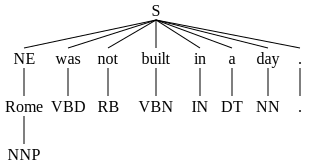

In [ ]:
entities = nltk.ne_chunk(tags, binary=True)
entities

11. 단어 중의성(Lexical Ambiguity)

In [ ]:
import nltk
from nltk.wsd import lesk

s = 'I saw bats.'
#saw나 bats가 여러 의미가 존재함. ->중의성을 가짐. => 이럴 때 어떤 의미에 가까운지 찾는 것

print(word_tokenize(s))
print(lesk(word_tokenize(s), 'saw'))
print(lesk(word_tokenize(s), 'bats'))

['I', 'saw', 'bats', '.']
Synset('saw.v.01')
Synset('squash_racket.n.01')


In [ ]:
#v : 동사, n : 명사

<한국어 처리>

1. 정규표현식
- 한국어 정규 표현식도 대부분의 문법은 영어 정규 표현식과 같음.
- 자/모음이 분리되어 있기 때문에 문법 지정 시 자음과 모음을 동시에 고려해야 함.

In [ ]:
#1.1 match
import re

check = '[ㄱ-ㅎ]+'

print(re.match(check, 'ㅎㅎ안녕'))
print(re.match(check, '안녕ㅎ'))
print(re.match(check, '하이하이'))

<re.Match object; span=(0, 2), match='ㅎㅎ'>
None
None


In [ ]:
#1.2 search : match와 다르게 문자열의 전체를 검사
check = '[ㄱ-ㅎ|ㅏ-ㅣ]+'

print(re.search(check, 'ㄱㅏ 안녕하세요'))
print(re.match(check, '안 ㄱㅏ'))
print(re.search(check, '안 ㄱㅏ'))

<re.Match object; span=(0, 2), match='ㄱㅏ'>
None
<re.Match object; span=(2, 4), match='ㄱㅏ'>


In [ ]:
#1.3 sub
print(re.sub('[가-힣]', '가나다 안녕하세요 히히 1 가가', '1'))
print(re.sub('[^가-힣]', '가나다라마바사', '1'))

1
가나다라마바사


2. 토큰화(Tokenization)
- 한국어를 학습 데이터를 사용할 때는 언어 특성을 고려해야 할 사항이 존재
- 띄어쓰기를 준수하지 않아도 의미 o -> 띄어쓰기가 안 지켜질 가능성 존재
- =>정상적인 토큰 분리 안됨
- 형태소 개념 고려 필요
- '그는', '그가' 등의 단어 처리 필요. 같은 의미지만 다르게 처리될 수 있기 때문

In [ ]:
#자연어 처리 konlpy와 형태소 분석기 MeCab 설치
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


- 한국어는 공백으로 단어를 분리해도 접속사, 조사 등이 남아 분석에 어려움.
- 이를 해결하는 토큰화방법은 조사, 접속사 분리 또는 제거하기
- 한국어 토큰화를 위해 konlpy와 macab이라는 라이브러리 필요

In [ ]:
pip install mecab-python3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 7.8 MB/s eta 0:00:00


In [ ]:
!sudo apt-get install -y python3-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!sudo apt-get update
!sudo apt-get install -y build-essential libmecab-dev mecab mecab-ipadic-utf8


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,105 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
G

In [ ]:
from konlpy.tag import Mecab
tagger = Mecab()

In [ ]:
sentence = '언제나 현재에 집중할 수 있다면 행복할것이다.'
tagger.pos(sentence)

[('언제나', 'MAG'),
 ('현재', 'NNG'),
 ('에', 'JKB'),
 ('집중', 'NNG'),
 ('할', 'XSV+ETM'),
 ('수', 'NNB'),
 ('있', 'VV'),
 ('다면', 'EC'),
 ('행복', 'NNG'),
 ('할', 'XSV+ETM'),
 ('것', 'NNB'),
 ('이', 'VCP'),
 ('다', 'EF'),
 ('.', 'SF')]

In [ ]:
#토큰화만 실행할 때는 tagger.morphs() 함수 사용
tagger.morphs(sentence)

['언제나', '현재', '에', '집중', '할', '수', '있', '다면', '행복', '할', '것', '이', '다', '.']

In [ ]:
#형태소만 사용하고 싶을 때에는 tagger.nouns() => 조사, 접속사 제거 가능
tagger.nouns(sentence)

['현재', '집중', '수', '행복', '것']

3. 문장 토큰화

In [ ]:
#kss 라이브러리 사용
!pip install kss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 66.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#라이브러리를 이용해도 한국어에는 전치 표현이 존재해 제대로 토큰화가 안됨.
# 좀 더 나은 학습을 위해 사용자는 해당 부분을 따로 처리해주어야 함.

import kss

text = '진짜? 내일 뭐하지. 이렇게 애매모호한 문장도? 밥은 먹었어? 나는...'
print(kss.split_sentences(text))

['진짜? 내일 뭐하지.', '이렇게 애매모호한 문장도?', '밥은 먹었어?', '나는...']


3. 정규 표현식을 이용한 토큰화

In [ ]:
from nltk.tokenize  import RegexpTokenizer

sentence = '안녕하세요 ㅋㅋ 저는 자연어 처리(Natural Language Processing)를ㄹ!! 배우고 있습니다. '
tokenizer = RegexpTokenizer('[가-힣]+')
tokens = tokenizer.tokenize(sentence)
tokens

['안녕하세요', '저는', '자연어', '처리', '를', '배우고', '있습니다']

In [ ]:
tokenizer = RegexpTokenizer('[ㄱ-ㅎ]+', gaps=True) #자음을 기준으로 분리하는것
tokens = tokenizer.tokenize(sentence)
tokens

['안녕하세요 ', ' 저는 자연어 처리(Natural Language Processing)를', '!! 배우고 있습니다. ']

In [ ]:
#케라스를 이용한 토큰화
import tensorflow as tf

from tensorflow.keras.preprocessing.text import text_to_word_sequence

sentence = '성공의 비결은 단 한 가지, 잘할 수 있는 일에 광적으로 집중하는 것이다. '

text_to_word_sequence(sentence)

['성공의', '비결은', '단', '한', '가지', '잘할', '수', '있는', '일에', '광적으로', '집중하는', '것이다']

In [ ]:
#TextBlob 이용

from textblob import TextBlob

blob = TextBlob(sentence)
blob.words

WordList(['성공의', '비결은', '단', '한', '가지', '잘할', '수', '있는', '일에', '광적으로', '집중하는', '것이다'])

<Bag of Words(BoW)>
- 단어의 빈도수 count

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["Think like a man of action and act like man of thougth."]

vector = CountVectorizer()
bow = vector.fit_transform(corpus)
print(bow.toarray()) #단어별 개수
print(vector.vocabulary_) #단어별 인덱스

[[1 1 1 2 2 2 1 1]]
{'think': 6, 'like': 3, 'man': 4, 'of': 5, 'action': 1, 'and': 2, 'act': 0, 'thougth': 7}


In [ ]:
vector = CountVectorizer(stop_words ='english')
bow = vector.fit_transform(corpus)

print(bow.toarray()) #단어별 개수
print(vector.vocabulary_) #단어별 인덱스

[[1 1 2 2 1 1]]
{'think': 4, 'like': 2, 'man': 3, 'action': 1, 'act': 0, 'thougth': 5}


In [ ]:
corpus = ["평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라."]

vector = CountVectorizer()
bow = vector.fit_transform(corpus)

print(bow.toarray()) #단어별 개수
print(vector.vocabulary_) #단어별 인덱스

[[2 1 1 1 1 1 1 1 1]]
{'평생': 8, '것처럼': 0, '꿈을': 3, '꾸어라': 2, '그리고': 1, '내일': 4, '죽을': 7, '오늘을': 6, '살아라': 5}


In [ ]:
import re
from konlpy.tag import Mecab

tagger = Mecab()

corpus = '평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라.'
tokens = tagger.morphs(re.sub("(\.)", "", corpus))

vocab = {}
bow = []

for tok in tokens:
  if tok not in vocab.keys():
    vocab[tok] = len(vocab)
    bow.insert(len(vocab)-1, 1)
  else:
    index = vocab.get(tok) #인덱스 가져옴
    bow[index] = bow[index]+1


print(bow)
print(vocab)

[1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1]
{'평생': 0, '살': 1, '것': 2, '처럼': 3, '꿈': 4, '을': 5, '꾸': 6, '어라': 7, '그리고': 8, '내일': 9, '죽': 10, '오늘': 11, '아라': 12}


<문서 단어 행렬(DTM)>
- 문서 단어 행렬은 문서에 등장하는 여러 단어들의 빈도를 행렬로 표현
- 각 문서에 대한 BoW를 하나의 행렬로 표현한 것.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["Think like a man of action and act like man of thought.",
          "Try not to become a man of success but rather try to become a man of value.",
          "Give me liberty, of give me death."]

vector = CountVectorizer(stop_words='english')
bow = vector.fit_transform(corpus)

print(bow.toarray())

print(vector.vocabulary_)

[[1 1 0 0 2 2 0 1 1 0 0]
 [0 0 0 0 0 2 1 0 0 2 1]
 [0 0 1 1 0 0 0 0 0 0 0]]
{'think': 7, 'like': 4, 'man': 5, 'action': 1, 'act': 0, 'thought': 8, 'try': 9, 'success': 6, 'value': 10, 'liberty': 3, 'death': 2}


In [ ]:
import pandas as pd

columns = []
for k, v in sorted(vector.vocabulary_.items(), key = lambda item:item[1]):
  columns.append(k)

df = pd.DataFrame(bow.toarray(), columns = columns)
df

,act,action,death,liberty,like,man,success,think,thought,try,value
0,1,1,0,0,2,2,0,1,1,0,0
1,0,0,0,0,0,2,1,0,0,2,1
2,0,0,1,1,0,0,0,0,0,0,0


<어휘 빈도-문서 역빈도 분석(TF-IDF)>

- TF-IDF(Term frequence-Inverse Document Frequency) : 특정 주제어가 특정 문서에서만 집중적으로 등장할 때 그 단어가 그 문서의 주제의 핵심어로 간주
- 어휘 빈도 * 역문서 빈도 로 계산
- 어휘 빈도 : 특정 문서에서 특정 단어가 많이 등장하는 것
- 역문서 빈도 : 다른 문서에서 등장하지 않는 단어 빈도 => log(N/df_x)

- 편리한 계산을 위해 scikit-learn의 tfidfvectorizer 이용

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english').fit(corpus)

print(tfidf.transform(corpus).toarray())
print(tfidf.vocabulary_)

[[0.311383   0.311383   0.         0.         0.62276601 0.4736296
  0.         0.311383   0.311383   0.         0.        ]
 [0.         0.         0.         0.         0.         0.52753275
  0.34682109 0.         0.         0.69364217 0.34682109]
 [0.         0.         0.70710678 0.70710678 0.         0.
  0.         0.         0.         0.         0.        ]]
{'think': 7, 'like': 4, 'man': 5, 'action': 1, 'act': 0, 'thought': 8, 'try': 9, 'success': 6, 'value': 10, 'liberty': 3, 'death': 2}


In [ ]:
columns = []
for k, v in sorted(tfidf.vocabulary_.items(), key = lambda item:item[1]):
  columns.append(k)

df = pd.DataFrame(tfidf.transform(corpus).toarray(), columns = columns)
df

,act,action,death,liberty,like,man,success,think,thought,try,value
0,0.311383,0.311383,0.000000,0.000000,0.622766,0.473630,0.000000,0.311383,0.311383,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.527533,0.346821,0.000000,0.000000,0.693642,0.346821
2,0.000000,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
